## Analyzing Netflix Data - Data Exploration and Visualisation

In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# text processing and NLP
import nltk
#from textblob import TextBlob


In [4]:
netflix_df = pd.read_csv("netflix_titles.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_df.shape

(8807, 12)

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Approach to fill missing values
1. Director Column - Filling it with Unknown Director

2. Cast Column - Filling it with Unknown Cast

3. Country Column - Filling it with Unknown Country

In [9]:
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [10]:
type_counts = netflix_df.value_counts('type')
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

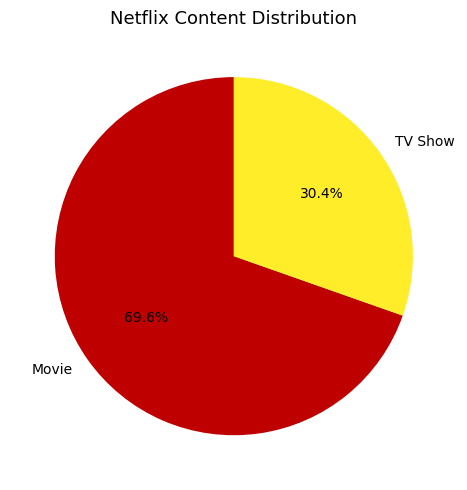

In [11]:
# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    type_counts.values,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=["#bf0000", "#FFED29"],
    startangle=90
)

plt.title('Netflix Content Distribution', fontsize=13)
plt.tight_layout()
plt.show()

 *** 🔍 Initial Statistical Summary of Netflix Content 

- Content Type Distribution - Among the 8.807 entries in the Netflix dataset, movies dominate with 6.131 releases, representing approximately 69.6% of the total content, while TV shows make up the remaining 30.4%, totaling 2.676 releases. The Drama category and International movies are leading comprising  362 releases across both movies and TV shows.

- Directors - Rajiv Chilaka is the most prolific directors in the dataset with 19 releases

- Cast -  David Attenborough leads the actor list with 19 frequent appearances in various films and shows on Netflix.

- Country - The United States is the primary contributor to Netflix’s content, accounting for 2818 (35.5%) of all titles, making it the top country in terms of production volume.

- Date Added - January 1, 2020, marks the highest single-day spike in content uploads to Netflix, with approximately 109 titles added on that date alone. 

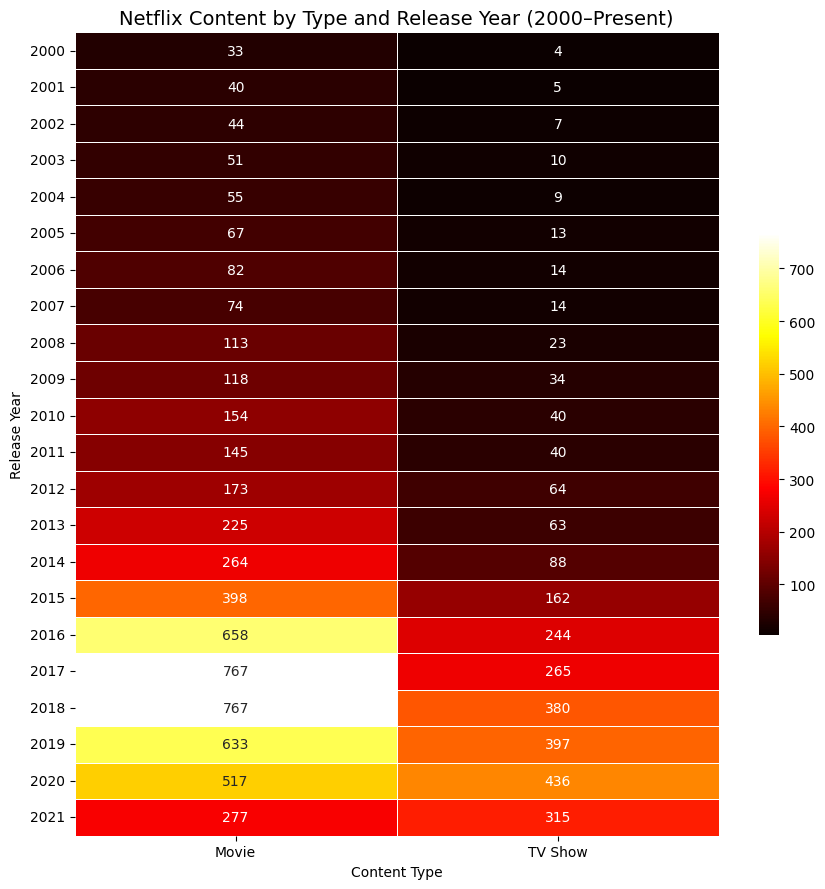

In [12]:
heatmap_data = netflix_df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)
heatmap_data = heatmap_data[heatmap_data.index >= 2000]

plt.figure(figsize=(9, 9))  
sns.heatmap(heatmap_data, cmap="hot", linewidths=0.5, annot=True, fmt='d', cbar_kws={"shrink": 0.5})
plt.title('Netflix Content by Type and Release Year (2000–Present)', fontsize=14)
plt.ylabel('Release Year')
plt.xlabel('Content Type')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
#Filtering only the Movies 
netflixMovies = netflix_df[netflix_df['type'] == 'Movie']
netflixMovies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [14]:
#clean the data -- keeping only the needed columns! 
keep=['title','country','listed_in','director','duration',"description",'release_year','date_added', 'rating']
netflixMovies = netflixMovies[keep]
print(netflixMovies.columns)

Index(['title', 'country', 'listed_in', 'director', 'duration', 'description',
       'release_year', 'date_added', 'rating'],
      dtype='object')


In [15]:
#Check the data for duplicated movies 
netflixMovies['title'].duplicated().sum()

0

Netflix Content Over Time

How has the volume of content on Netflix grown over the years?

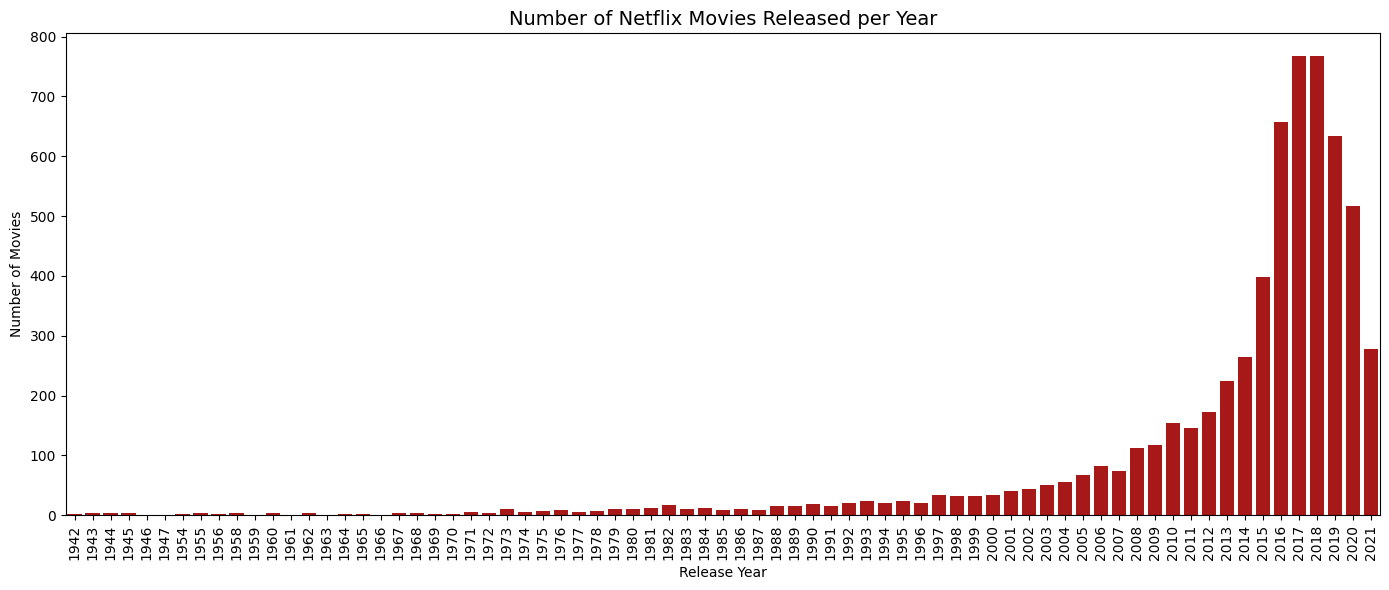

In [16]:
movie_counts_by_year = netflixMovies.value_counts("release_year")
#print(Movie_counts_by_year)

plt.figure(figsize=(14, 6))
bars = sns.barplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values, color="#bf0000")

plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Netflix Movies Released per Year',fontsize=14)
plt.tight_layout()
plt.show()


In [17]:
#movies released in the 20s
movies_released_20s = netflixMovies[netflixMovies["release_year"] >= 2000]

releases_per_year = movies_released_20s.value_counts("release_year").reset_index(name="count")

#Calculate average movie releases in the 20s
average_releases = releases_per_year['count'].mean()
print(f"Average number of movies released per year since 2000: {average_releases:.2f}")

Average number of movies released per year since 2000: 257.05


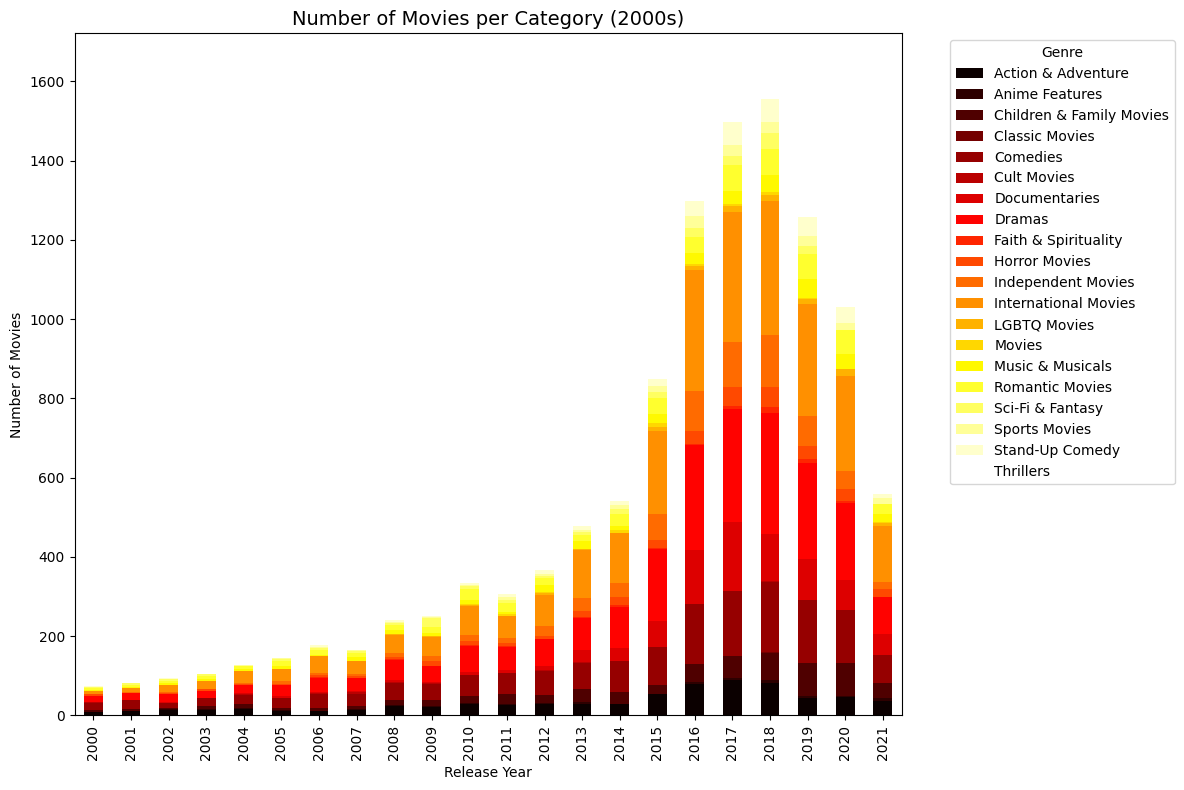

In [18]:
df_genres = movies_released_20s.assign(genre=movies_released_20s['listed_in'].str.split(',')).explode('genre')
df_genres.drop("listed_in", axis='columns')
df_genres['genre'] = df_genres['genre'].str.strip()

genre_counts = df_genres.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Pivot data to get genres as columns
pivot_df = genre_counts.pivot(index='release_year', columns='genre', values='count').fillna(0)

# Plot stacked barplot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='hot')

plt.title('Number of Movies per Category (2000s)',fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
#Remove ' min' from duration column (only for movies)
df_movies =movies_released_20s.copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '', regex=False)

df_movies = df_movies[df_movies['duration_minutes'].notna()]

#Keep only numeric duration values
df_movies = df_movies[df_movies['duration_minutes'].str.isnumeric()]

df_movies['duration_minutes'] = df_movies['duration_minutes'].astype(int)
df_movies['duration_minutes'].describe()

count    5652.000000
mean       98.280609
std        27.219228
min         3.000000
25%        86.000000
50%        98.000000
75%       113.000000
max       312.000000
Name: duration_minutes, dtype: float64

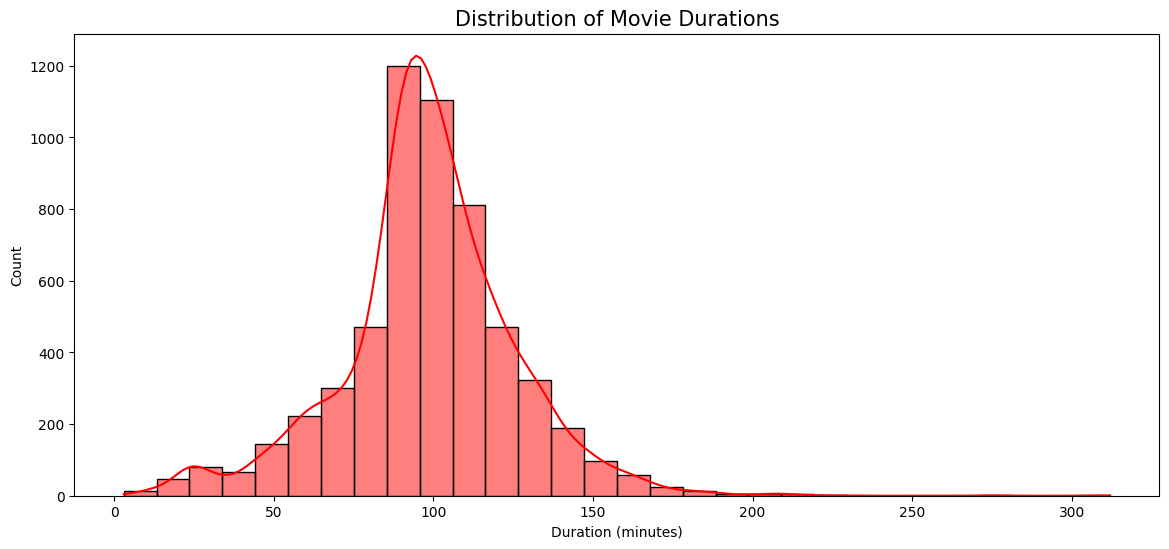

In [20]:
plt.figure(figsize=(14, 6))

sns.histplot(df_movies['duration_minutes'], bins=30, kde=True, color='red')
plt.title("Distribution of Movie Durations",fontsize=15)
plt.xlabel("Duration (minutes)")
plt.show()

- Netflix movie production has expanded over recent decades with an average of 200 movies produced since the 20s, with most movies falling into a standard duration range of 90–100 minutes. 
- The overall trend reflects Netflix’s strategy of expanding its movie library both in quantity and genre variety, with Drama, Sci-Fi, and Comedies being the dominant genres, especially in the years leading up to 2021.

Directors with the most movie appearances

In [21]:
print(netflixMovies.value_counts('director'))

director
Unknown                                  188
Rajiv Chilaka                             19
Raúl Campos, Jan Suter                    18
Suhas Kadav                               16
Marcus Raboy                              15
                                        ... 
Jose Javier Reyes                          1
Joseduardo Giordano, Sergio Goyri Jr.      1
Josef Fares                                1
Joseph Cross                               1
Kief Davidson, Pedro Kos                   1
Name: count, Length: 4355, dtype: int64


- Rajiv Chilaka has the highest number of released movies in the Children & Family category, Followed by Raùl Campos and Jan Stuter in the Stand-Up Comedy category 

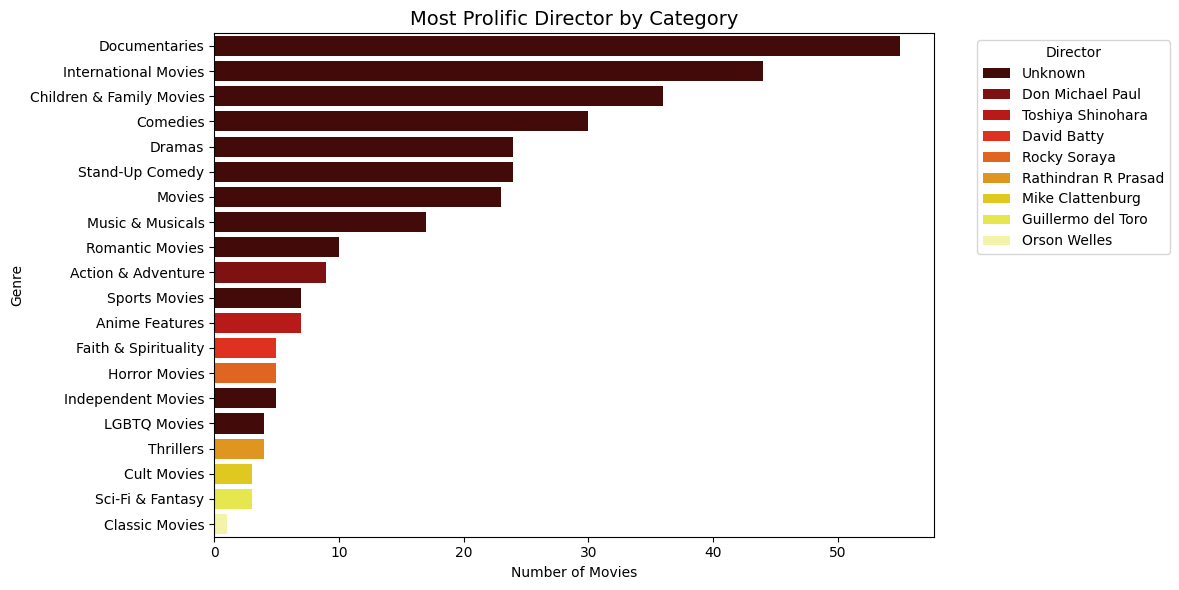

In [22]:
#which director has released the most movies for each category?
genre_director_counts = df_genres.groupby(['genre', 'director']).size().reset_index(name='count')

top_directors_per_genre = genre_director_counts.sort_values('count', ascending=False).drop_duplicates('genre')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors_per_genre, x='count', y='genre', hue='director', dodge=False, palette='hot')
plt.title('Most Prolific Director by Category', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top Countries Producing Netflix Content: 

Which countries are the biggest contributors to Netflix’s content library? and in each category?

In [23]:
movies_released_20s['country'].value_counts()

country
United States                            1833
India                                     812
Unknown                                   421
United Kingdom                            192
Canada                                    121
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 628, dtype: int64

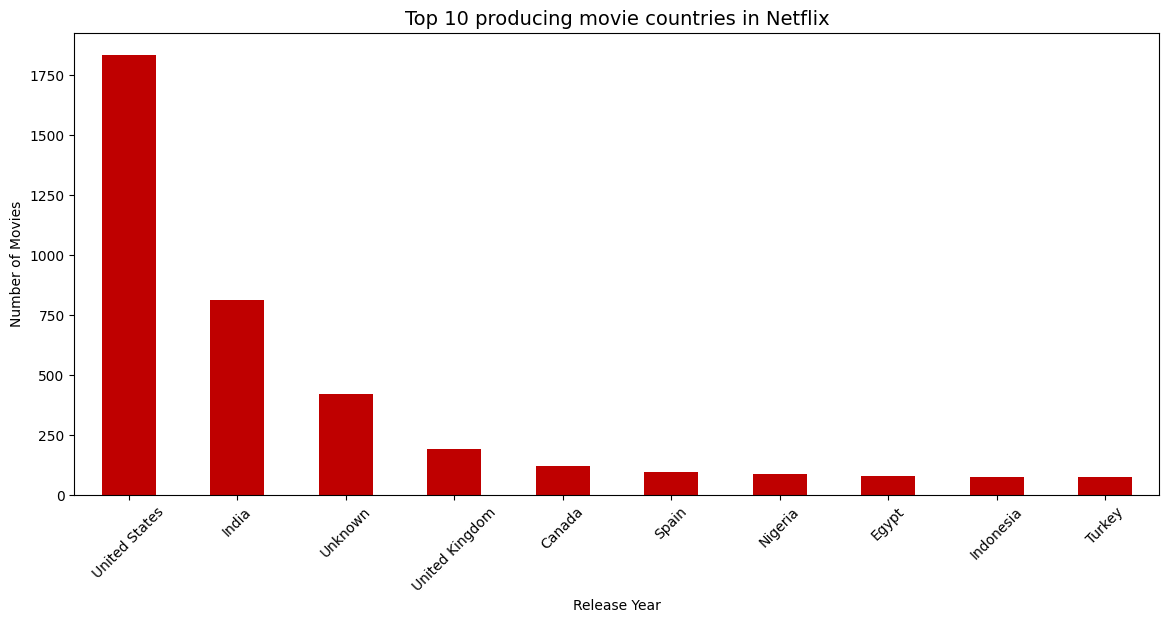

In [24]:
plt.figure(figsize=(14, 6))

movies_released_20s['country'].value_counts().head(10).plot(kind='bar', color='#bf0000')

plt.xticks(rotation=45)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Top 10 producing movie countries in Netflix', fontsize=14)
plt.show()

- Content Investment Strategy and Global Expansion: Netflix heavily invests in content production in the USA, its home country, to attract more subscribers, releasing over 1.833 movies since the beginning of 2000s. India, being the second on the list releasing over 812 movies, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services

In [25]:
country_counts_by_category = df_genres.groupby(['country', "genre"]).size().reset_index(name='count')

top_country_per_category = country_counts_by_category.loc[country_counts_by_category.groupby('genre')['count'].idxmax()].reset_index(drop=True)

top_country_per_category

,country,genre,count
0,United States,Action & Adventure,197
1,Japan,Anime Features,51
2,United States,Children & Family Movies,244
3,"France, Iran, United States",Classic Movies,1
4,United States,Comedies,454
5,United States,Cult Movies,11
6,United States,Documentaries,392
7,India,Dramas,560
8,United States,Faith & Spirituality,30
9,United States,Horror Movies,129


Content Ratings Distribution

What are the most common content ratings on Netflix?

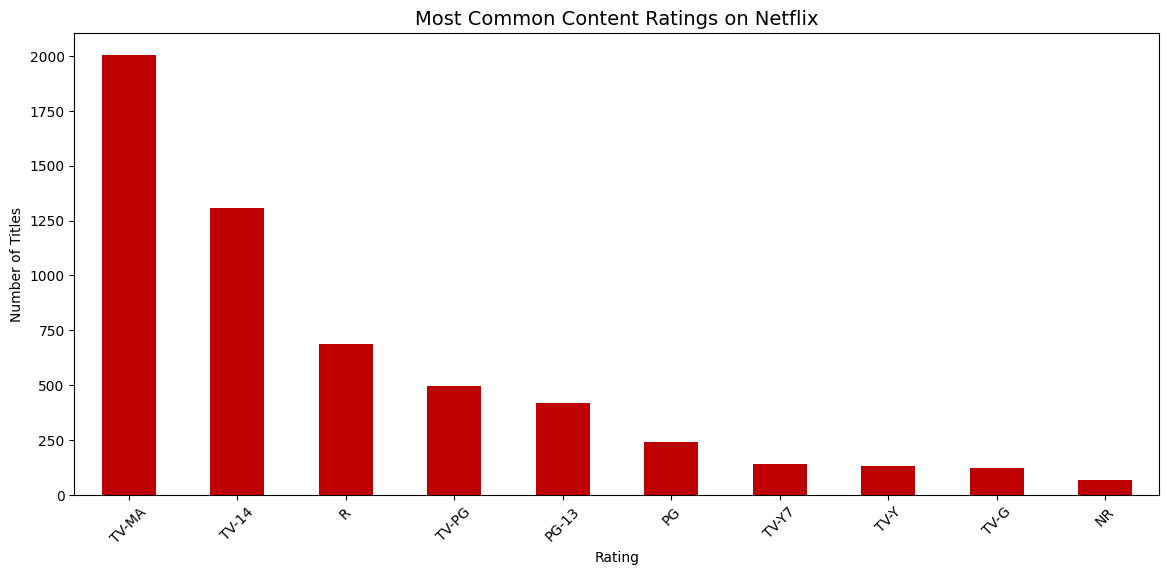

In [26]:
plt.figure(figsize=(14, 6))

movies_released_20s['rating'].value_counts().head(10).plot(kind='bar', color='#bf0000')

plt.title('Most Common Content Ratings on Netflix', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

**Sentiment Analysis of Description**



In [28]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply function and create new columns
df_genres[['polarity', 'subjectivity']] = df_genres['description'].apply(
    lambda x: pd.Series(get_sentiment(x))
)


In [ ]:
def mood_from_polarity(p):
    if p <= -0.3:
        return 'Dark'
    elif -0.3 < p < 0:
        return 'Serious'
    elif 0 <= p < 0.3:
        return 'Neutral/Light'
    else:
        return 'Comedic/Positive'

df_genres['mood'] = df_genres['polarity'].apply(mood_from_polarity)


C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3601260156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_genres, x='mood', order=df_genres['mood'].value_counts().index, palette="hot")


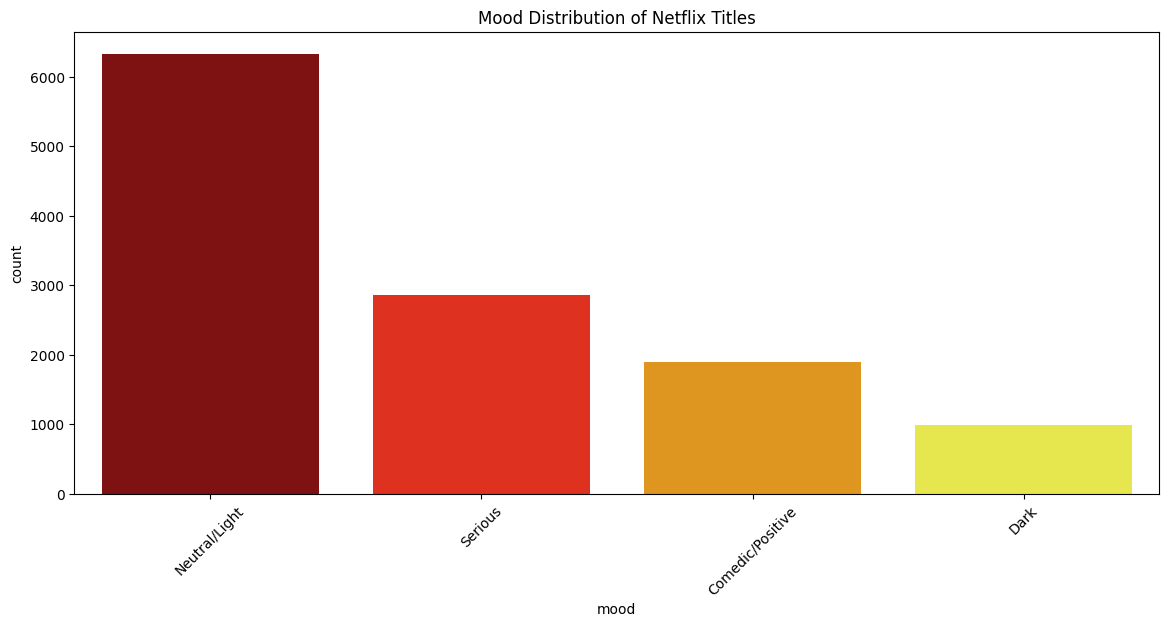

In [42]:
plt.figure(figsize=(14,6))

sns.countplot(data=df_genres, x='mood', order=df_genres['mood'].value_counts().index, palette="hot")
plt.title('Mood Distribution of Netflix Titles')
plt.xticks(rotation=45)
plt.show()


C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3382270362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')


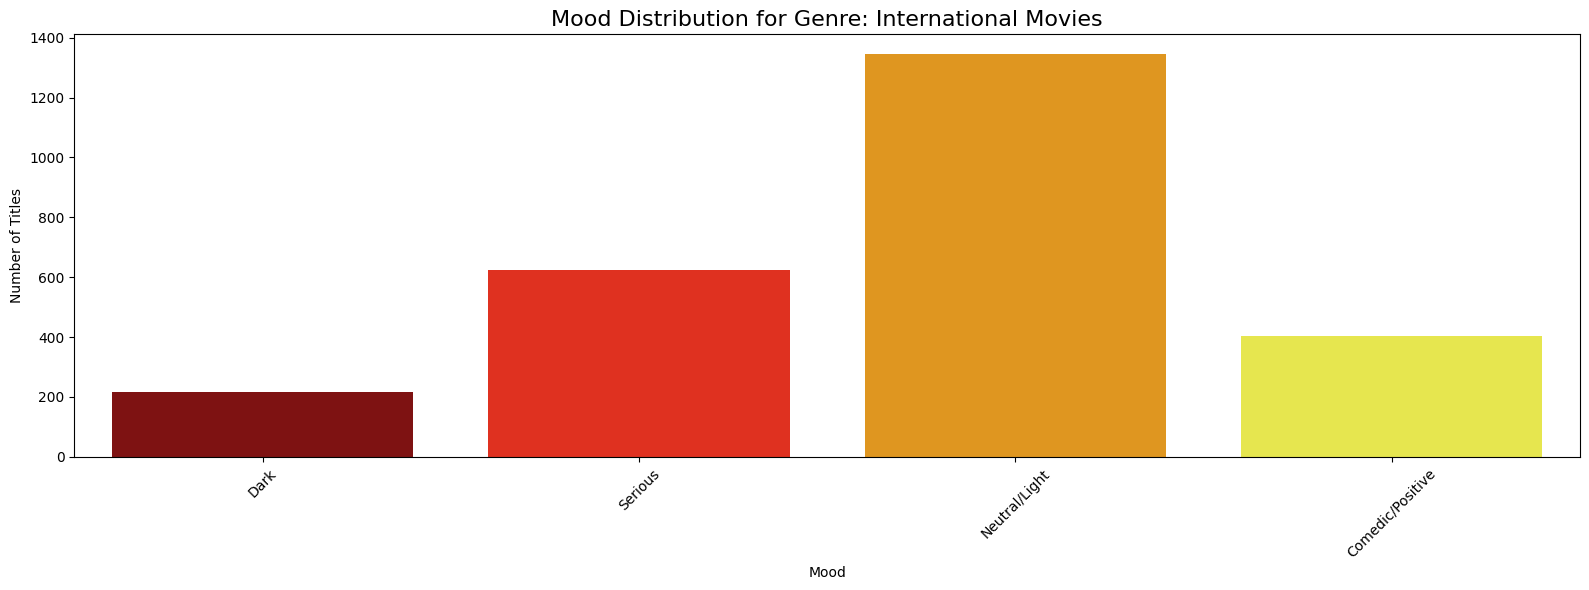

C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3382270362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')


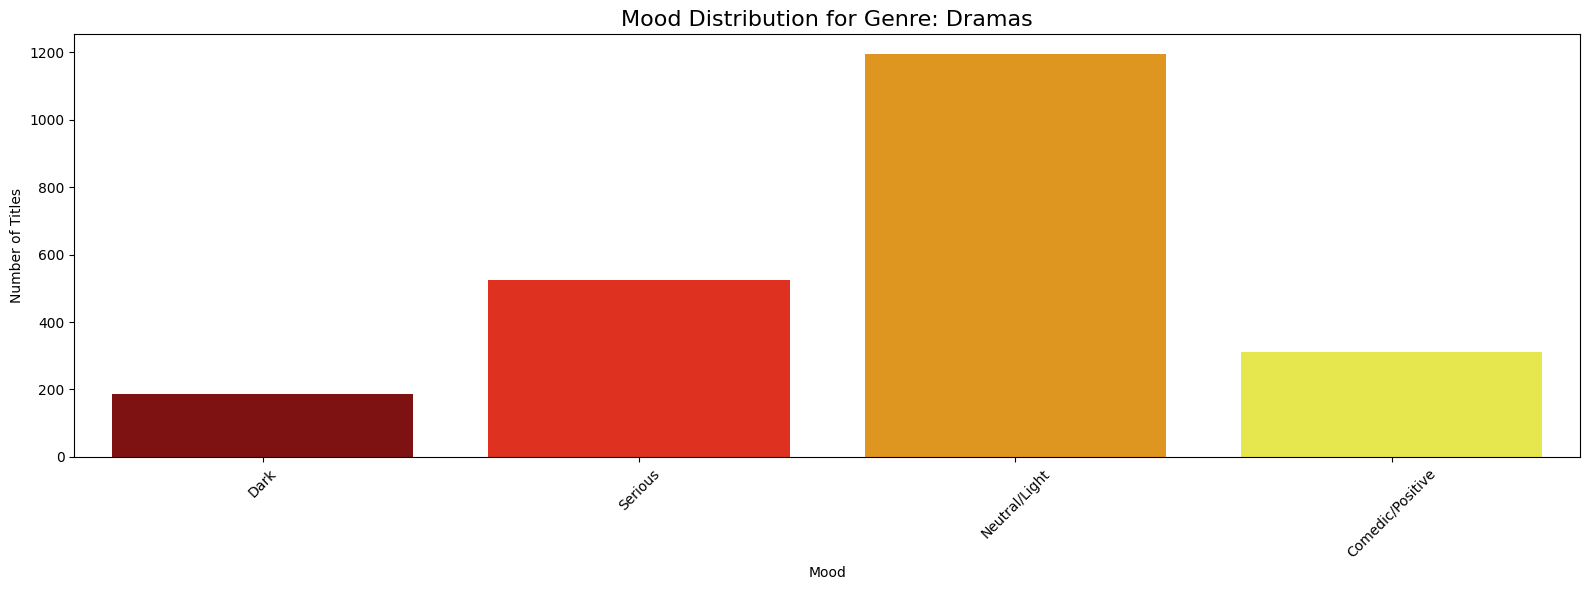

C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3382270362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')


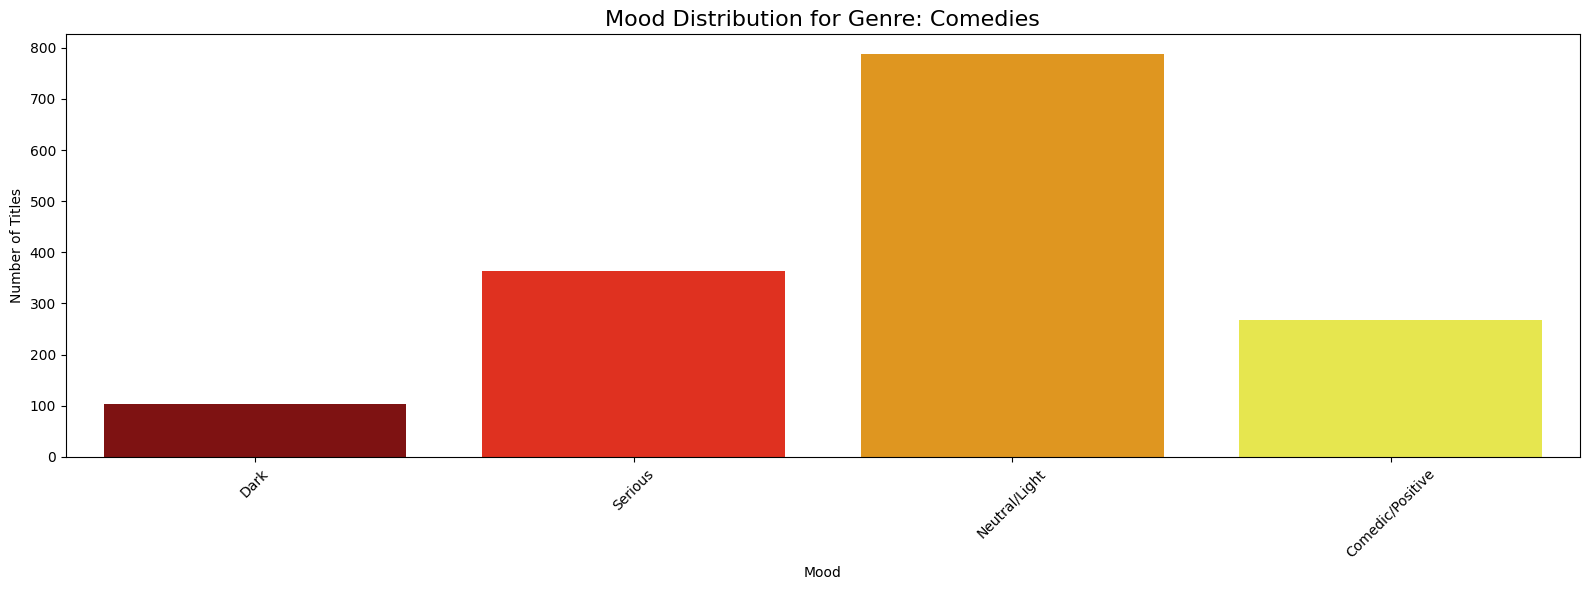

C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3382270362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')


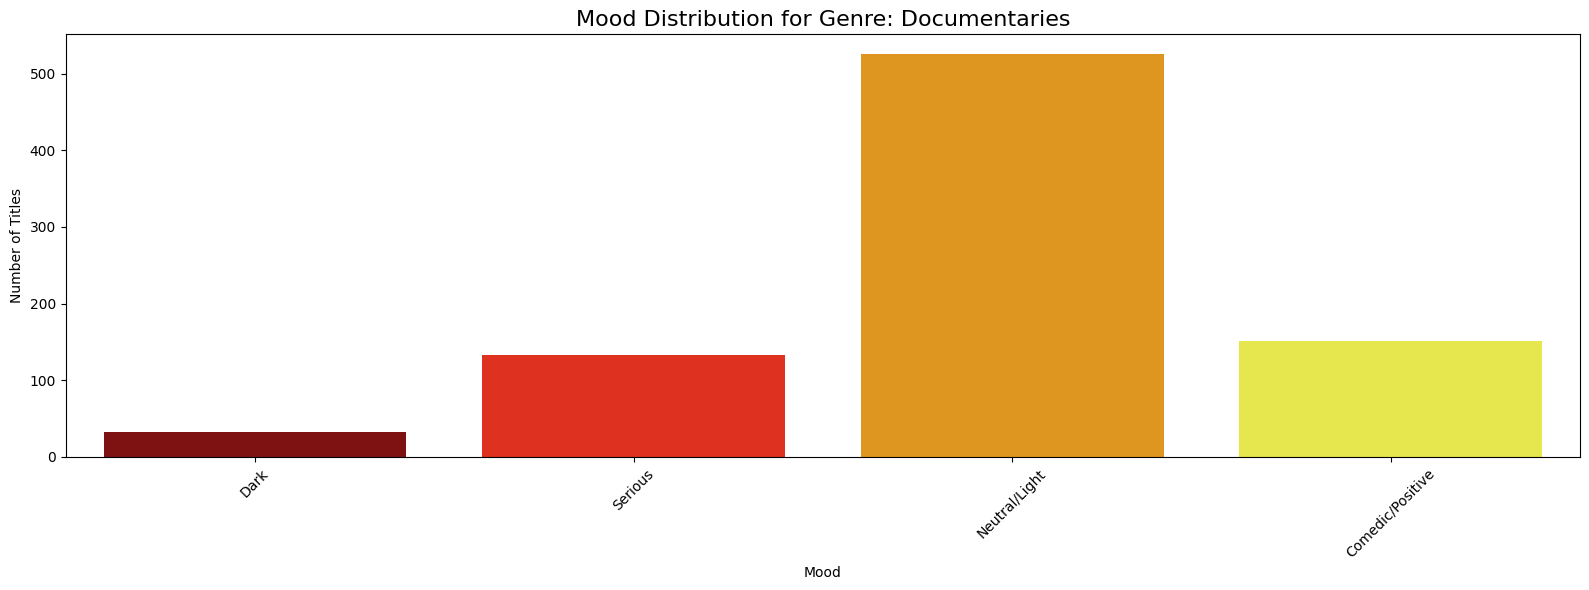

C:\Users\larbi\AppData\Local\Temp\ipykernel_31240\3382270362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')


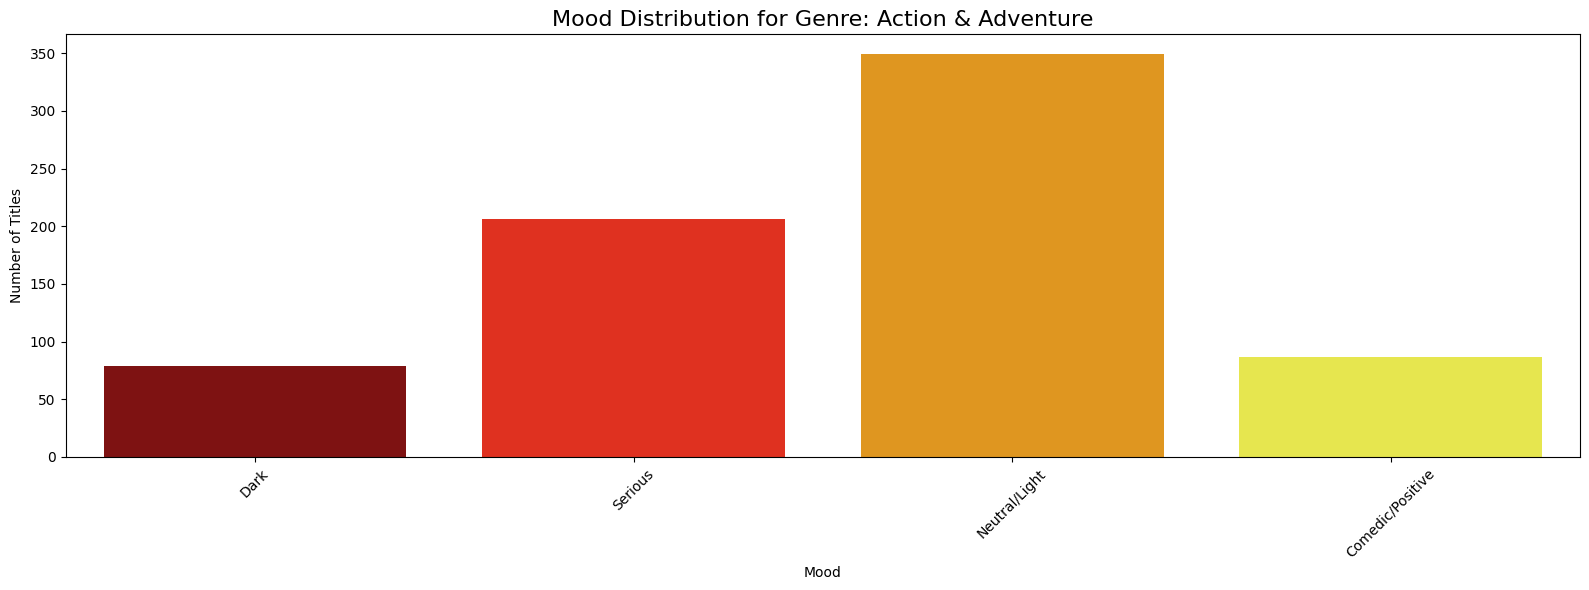

In [46]:
top_genres = df_genres['genre'].value_counts().head(5).index.tolist()

for genre in top_genres:
    subset = df_genres[df_genres['genre'] == genre]
    
    plt.figure(figsize=(16, 6))
    sns.countplot(data=subset, x='mood', order=['Dark', 'Serious', 'Neutral/Light', 'Comedic/Positive'], palette='hot')
    plt.title(f"Mood Distribution for Genre: {genre}", size=16)
    plt.xlabel('Mood')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
